# Data Preparation

## Import and Settings

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import dask
import dask.dataframe as dd
import dask.array as da

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from joblib import dump

In [6]:
df = dd.read_csv('prepared_ds.csv')

## df_fast initialisieren (size = 0.01)

In [7]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()

In [7]:
df_big = df.compute()

In [8]:
df = df_fast

## trainieren (80, 20, random_state = 1)

In [9]:
train, test, train_lbl, test_lbl = train_test_split(df.loc[:, ~df.columns.isin(['Unnamed: 0', "Label"])], df["Label"], test_size=0.2, random_state=1)

### M1

In [10]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']

In [11]:
scores = []
for k, g, d in list(itertools.product(penalty, solver, multi_class)):
    try:
        clf = LogisticRegression(penalty = k, solver=g, multi_class=d)
        clf.fit(train, train_lbl)
        score = clf.score(test, test_lbl)
    except:
        score = -1
    s = f"penalty: {k}, solver: {g}, multi_class: {d}"
    scores.append([score, s])

In [12]:
scores.sort(reverse = True)
print(len(scores))
for score, string in scores[:10]:
    print(score, string)

60
0.9842657342657343 penalty: none, solver: newton-cg, multi_class: ovr
0.9842657342657343 penalty: none, solver: newton-cg, multi_class: multinomial
0.9842657342657343 penalty: none, solver: newton-cg, multi_class: auto
0.9823717948717948 penalty: l1, solver: liblinear, multi_class: ovr
0.9819347319347319 penalty: l1, solver: liblinear, multi_class: auto
0.9709353146853147 penalty: l2, solver: lbfgs, multi_class: multinomial
0.9708624708624709 penalty: none, solver: lbfgs, multi_class: multinomial
0.9705710955710956 penalty: l2, solver: lbfgs, multi_class: ovr
0.9705710955710956 penalty: l2, solver: lbfgs, multi_class: auto
0.9704254079254079 penalty: l2, solver: newton-cg, multi_class: ovr


In [13]:
model.predict(inputs)[:10]

array(['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign'], dtype=object)

In [20]:
model.score(test, test_lbl)

0.9705710955710956

In [27]:
model.predict_proba(inputs)

array([[5.87046953e-02, 9.41295305e-01],
       [8.88812472e-03, 9.91111875e-01],
       [5.81489211e-01, 4.18510789e-01],
       ...,
       [9.83846424e-01, 1.61535758e-02],
       [9.99998493e-01, 1.50677940e-06],
       [9.01984192e-01, 9.80158076e-02]])

## confusion matrix (fp (wenn 1 (positiv) = DDoS) minimieren)

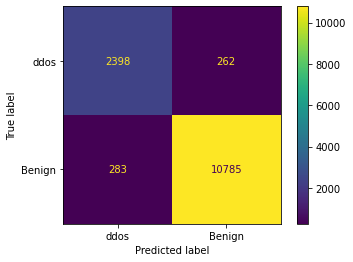

In [14]:
plot_confusion_matrix(clf, test, test_lbl, labels=['ddos', 'Benign'])

In [ ]:
dump(clf, 'models/logistic_regression.joblib')